In hypothesis testing, **p-values** and **confidence intervals (CIs)** are essential tools for making statistical inferences. Here’s how they are interpreted:

### **1. P-values and Statistical Significance**
- The **p-value** represents the probability of obtaining a test statistic as extreme as the one observed, assuming the null hypothesis (\(H_0\)) is true.
- A **small p-value** (typically < 0.05) suggests that the observed data is unlikely under \(H_0\), leading to its rejection in favor of the alternative hypothesis (\(H_A\)).
- A **large p-value** (≥ 0.05) suggests insufficient evidence to reject \(H_0\), meaning the observed effect could be due to chance.

### **2. Confidence Intervals and Plausible Parameter Values**
- A **confidence interval (CI)** provides a range of plausible values for the population parameter (e.g., mean, proportion).
- A **95% CI** means that if we were to repeat the study many times, 95% of the intervals generated would contain the true population parameter.
- If a CI **excludes** the null value (e.g., 0 for differences, 1 for ratios), it supports rejecting \(H_0\), aligning with a significant p-value.
- If a CI **includes** the null value, we do not have strong evidence against \(H_0\).

### **Relationship Between P-values and Confidence Intervals**
- A **p-value < 0.05** typically corresponds to a 95% CI that **does not** include the null value.
- A **p-value ≥ 0.05** typically corresponds to a 95% CI that **includes** the null value.

Thus, while p-values provide a direct measure of statistical significance, confidence intervals offer additional insights by showing the precision and range of the estimated effect.

# Q: Analyze whether the number of hours played weekly (0-20 vs. >20) affects the rank (Gold, Silver, Bronze).


1. **Data Generation**:
   - Randomly generates `number_of_hours_played_weekly` between 0 and 50.
   - Assigns a rank (`Gold, Silver, Bronze`) based on `hours_played`.

2. **Statistical Analysis**:
   - **Chi-square test**: Determines if rank distribution differs between `0-20` and `>20` hours groups. (Test for independence categorical vs categorical)
   - **Confidence Intervals**: Computes 95% confidence intervals for rank proportions in each play category.

3. **Visualizations**:
   - **Bar plot**: Shows the distribution of ranks by play category.
   - **Box plot**: Compares hours played across different ranks.


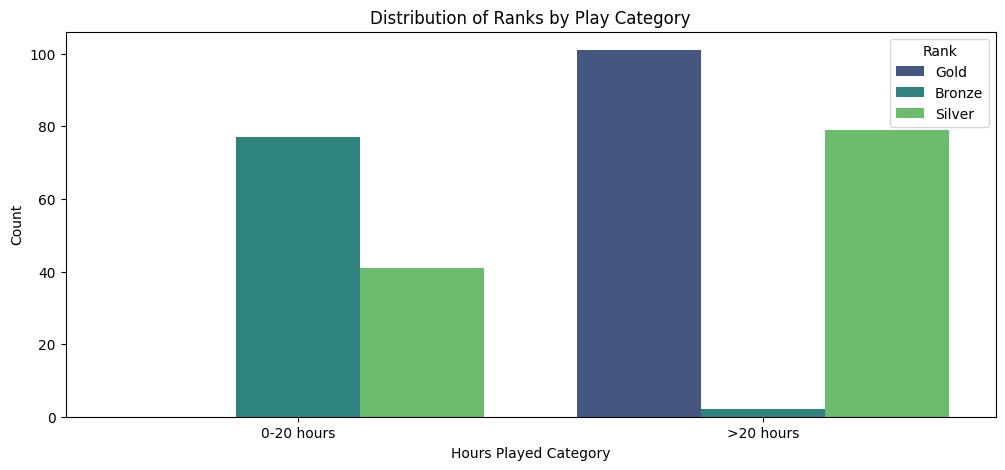

<ipython-input-1-b219ef70e449>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rank', y='Hours_Played', data=df, palette='coolwarm')


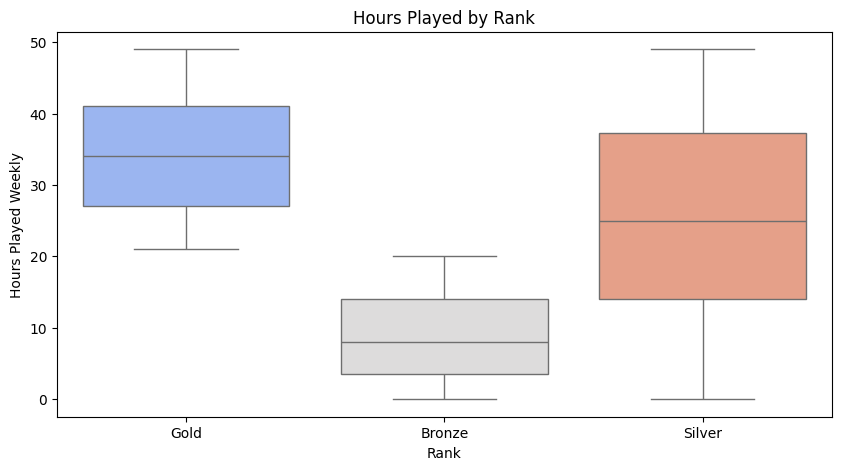

Chi-Square Test Results:
Chi2 Statistic: 178.7161, p-value: 0.0000

Confidence Intervals for Rank Proportions in Each Play Category:
>20 hours:
  Bronze: -0.004 to 0.026
  Silver: 0.362 to 0.506
  Gold: 0.483 to 0.627
0-20 hours:
  Bronze: 0.567 to 0.738
  Silver: 0.262 to 0.433
  Gold: 0.000 to 0.000


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
n = 300  # Sample size

# Generate number of hours played weekly
hours_played = np.random.randint(0, 50, n)

# Assign ranks based on hours played (some randomness added)
def assign_rank(hours):
    if hours <= 20:
        return np.random.choice(['Bronze', 'Silver'], p=[0.6, 0.4])
    else:
        return np.random.choice(['Silver', 'Gold'], p=[0.4, 0.6])

ranks = np.array([assign_rank(h) for h in hours_played])

# Create a DataFrame
df = pd.DataFrame({'Hours_Played': hours_played, 'Rank': ranks})

# Categorize into two groups: 0-20 and >20
bins = [0, 20, 50]
labels = ['0-20 hours', '>20 hours']
df['Play_Category'] = pd.cut(df['Hours_Played'], bins=bins, labels=labels, right=False)

# Chi-square test for independence
contingency_table = pd.crosstab(df['Play_Category'], df['Rank'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Confidence Intervals for proportions
def proportion_confidence_interval(count, n, confidence=0.95):
    p_hat = count / n
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    margin = z * np.sqrt((p_hat * (1 - p_hat)) / n)
    return p_hat - margin, p_hat + margin

ci_results = {}
for category in df['Play_Category'].unique():
    subset = df[df['Play_Category'] == category]['Rank'].value_counts()
    ci_results[category] = {rank: proportion_confidence_interval(subset.get(rank, 0), len(df[df['Play_Category'] == category])) for rank in ['Bronze', 'Silver', 'Gold']}

# Plot results
plt.figure(figsize=(12, 5))
sns.countplot(x='Play_Category', hue='Rank', data=df, palette='viridis')
plt.title("Distribution of Ranks by Play Category")
plt.xlabel("Hours Played Category")
plt.ylabel("Count")
plt.legend(title='Rank')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Rank', y='Hours_Played', data=df, palette='coolwarm')
plt.title("Hours Played by Rank")
plt.xlabel("Rank")
plt.ylabel("Hours Played Weekly")
plt.show()

# Print test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")
print("\nConfidence Intervals for Rank Proportions in Each Play Category:")
for category, ci in ci_results.items():
    print(f"{category}:")
    for rank, (lower, upper) in ci.items():
        print(f"  {rank}: {lower:.3f} to {upper:.3f}")


- Among players who play 0-20 hours, the proportion of Bronze-ranked players is likely between 56% and 74%.

- Among players who play >20 hours, the proportion of Gold-ranked players is likely between 48% and 63%.

- This suggests that playing more hours increases the likelihood of being Gold while reducing the chance of being Bronze.